**Custom Models and Training with TensorFlow**


This notebook is inspired from the handson-ml2 GitHub repository by Aurélien Geron

https://github.com/ageron/handson-ml2

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    !pip install -U tqdm
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Tensors and operations

## Tensors

In [2]:
# Scalar Tensor of integer

tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [3]:
# Scalar Tensor of Float


tf.constant(42.1)

<tf.Tensor: shape=(), dtype=float32, numpy=42.1>

In [4]:
# Tensor representing matrix with two rows and three columns of floats

tf.constant([[1., 2., 3.], [4., 5., 6.]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [5]:
# Check shape of Tensor

t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t.shape

TensorShape([2, 3])

In [6]:
# Check data type of Tensor

t.dtype

tf.float32

In [7]:
# Tensor Operation - Addition

t + 5

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 6.,  7.,  8.],
       [ 9., 10., 11.]], dtype=float32)>

In [8]:
# Tensor Operation - Addition - Another way


tf.add(t,5)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 6.,  7.,  8.],
       [ 9., 10., 11.]], dtype=float32)>

In [9]:
# Tensor Operation - Square

tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [10]:
# Tensor Operation - Multiply

tf.multiply(t, 5)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [11]:
# Tensor Operation - Square root

tf.sqrt(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1.       , 1.4142135, 1.7320508],
       [2.       , 2.236068 , 2.4494898]], dtype=float32)>

In [13]:
# Tensor Operation - Transpose

tf.transpose(t)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 4.],
       [2., 5.],
       [3., 6.]], dtype=float32)>

In [14]:
# Tensor Operation - Matrix Multiplication

tf.matmul(t, tf.transpose(t))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [15]:
# # Tensor Operation - Matrix Multiplication - Another way

t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

## From/To NumPy

In [16]:
# Creating tensor from NumPy array

a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [17]:
# Convert tensor to Numpy array

t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [18]:
# Convert tensor to Numpy array - Another way

np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [19]:
# Creating tensor from NumPy array

tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [20]:
# Convert tensor to Numpy array

np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

## Conflicting Types

In [21]:
# Adding tensors of float and integer

# tf.constant(2.0) + tf.constant(40)

# The above code will throw exception

In [22]:
# Adding tensors of float and integer
# Handling Exception

try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: add/


In [134]:
# Adding tensors of 32-bit and 64-bit
# Handling Exception

try:
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: add/


In [135]:
# Type Casting
# Converting 64-bit tensor to 32-bit and then adding tensors

t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

## Variables

In [136]:
# tf variable with two rows and three columns

v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [137]:
# Modify in place with assign()

v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [138]:
# Update cell with assign()
# Update cells with index (0,1) to 42.0

v[0, 1].assign(42.0)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [139]:
# Update cell with scatter_nd_update()
# Update cells with index (0,0) and (1,2) to 100.0 and 200.0 respectively

v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   6.],
       [  8.,  10., 200.]], dtype=float32)>

## Other Data Structures - Strings

In [140]:
# String Tensor - Byte String

tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [141]:
# String Tensor - Unicode strings get encoded to utf-8 automatically

tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [142]:
# Represent Unicode strings using tensor of type tf.int32

u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

## String arrays

In [143]:
# Tensor of string arrays

p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])
p

<tf.Tensor: shape=(4,), dtype=string, numpy=
array([b'Caf\xc3\xa9', b'Coffee', b'caff\xc3\xa8',
       b'\xe5\x92\x96\xe5\x95\xa1'], dtype=object)>

## Ragged tensors

In [144]:
# List of lists, with each being of variable length
# Consider a speech like this, where the length may change wildly on each line

speech = tf.ragged.constant(
  [['All', 'the', 'world', 'is', 'a', 'stage'],
  ['And', 'all', 'the', 'men', 'and', 'women', 'merely', 'players'],
  ['They', 'have', 'their', 'exits', 'and', 'their', 'entrances']])

speech

<tf.RaggedTensor [[b'All', b'the', b'world', b'is', b'a', b'stage'], [b'And', b'all', b'the', b'men', b'and', b'women', b'merely', b'players'], [b'They', b'have', b'their', b'exits', b'and', b'their', b'entrances']]>

In [145]:
print(speech[0])

tf.Tensor([b'All' b'the' b'world' b'is' b'a' b'stage'], shape=(6,), dtype=string)


In [146]:
print(speech[1])

tf.Tensor([b'And' b'all' b'the' b'men' b'and' b'women' b'merely' b'players'], shape=(8,), dtype=string)


In [147]:
# One more example of Ragged Tensors
# Variable-length features, such as the set of actors in a movie.

actors = tf.ragged.constant(
  [['Matt Damon', 'Robin Williams'],
  ['John Travolta', 'Samuel L. Jackson', 'Uma Thurman', 'Harvey Keitel', 'Bruce Willis'],
  ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler']])

actors

<tf.RaggedTensor [[b'Matt Damon', b'Robin Williams'], [b'John Travolta', b'Samuel L. Jackson', b'Uma Thurman', b'Harvey Keitel', b'Bruce Willis'], [b'Tim Robbins', b'Morgan Freeman', b'Bob Gunton', b'William Sadler']]>

In [148]:
print(actors[0])

tf.Tensor([b'Matt Damon' b'Robin Williams'], shape=(2,), dtype=string)


In [149]:
print(actors[1])

tf.Tensor(
[b'John Travolta' b'Samuel L. Jackson' b'Uma Thurman' b'Harvey Keitel'
 b'Bruce Willis'], shape=(5,), dtype=string)


# Custom loss function

Let's start by loading and preparing the California housing dataset. We first load it, then split it into a training set, a validation set and a test set, and finally we scale it:

In [23]:
# Use fetch_california_housing() function to load the data. 
# This dataset contains only numerical features (there is no ocean_proximity feature)
# And there is no missing value. 
# After loading the data, we split it into a training set, a validation set, and a test set
# And we scale all the features


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# fetch the data
housing = fetch_california_housing()

# split it into a training set, a validation set, and a test set
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Scale all the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

## Custom Loss Function - Huber Loss

Let's implement huber loss. Huber loss is less sensitive to outliers in data than mean squared error.
Below is the formula of huber loss.

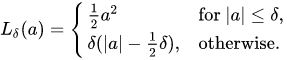

Huber loss (green) vs squared error loss (blue)

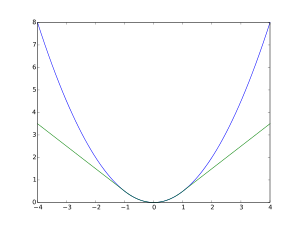

In [26]:
# Define a custom loss function
# Define Huber loss function

def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

In [27]:
# Build the network.
# Output layer just contains 1 neuron since we have to predict only one value

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [28]:
# Specify the loss function and the optimizer to use.
# Here we are using custom loss function
# Measure MAE during training and evaluation

model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [29]:
# Train the model

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 116us/sample - loss: 0.6180 - mae: 0.9793 - val_loss: 0.2435 - val_mae: 0.5304
Epoch 2/2
11610/11610 [==============================] - 1s 62us/sample - loss: 0.2080 - mae: 0.4988 - val_loss: 0.1915 - val_mae: 0.4737


# Saving/Loading Models with Custom Objects

In [30]:
# Save the model

model.save("my_model_with_a_custom_loss.h5")

In [31]:
# Load the model
# Specify the custom loss function while loading the model

loaded_model = keras.models.load_model("my_model_with_a_custom_loss.h5", custom_objects={"huber_fn": huber_fn})
loaded_model

In [32]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 72us/sample - loss: 0.2006 - mae: 0.4893 - val_loss: 0.1926 - val_mae: 0.4771
Epoch 2/2
11610/11610 [==============================] - 1s 71us/sample - loss: 0.1970 - mae: 0.4841 - val_loss: 0.1840 - val_mae: 0.4633


When you save the model, the threshold will not be saved. This means that you will have to specify the threshold value when loading the model. You can solve this by creating a subclass of the keras.losses.Loss class, and then implementing its get_config() method.

In [34]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [35]:
input_shape = X_train.shape[1:]
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [42]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [43]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 115us/sample - loss: 0.2095 - mae: 0.4750 - val_loss: 0.1956 - val_mae: 0.4635
Epoch 2/2
11610/11610 [==============================] - 1s 64us/sample - loss: 0.2069 - mae: 0.4727 - val_loss: 0.2107 - val_mae: 0.4594


In [44]:
model.save("my_model_with_a_custom_loss_class.h5")

In [45]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 64us/sample - loss: 0.2036 - mae: 0.4677 - val_loss: 0.2272 - val_mae: 0.4775
Epoch 2/2
11610/11610 [==============================] - 1s 63us/sample - loss: 0.2038 - mae: 0.4682 - val_loss: 0.1924 - val_mae: 0.4482


In [164]:
model.loss.threshold

2.0

# Custom Activation Functions, Initializers, Regularizers, and Constraints

In [165]:
# Clearing the session for any left over residues
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [46]:
# Defining a custom Activation Function
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

# Defining a custom Initializer
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

# Defining a custom Regularizer
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

# Defining a custom Constraint
def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [47]:
# Defining a layer in Keras with the custom activation function,
# initializer, regularizer, and constraint defined above

layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [48]:
# Clearing the session for any left over residues
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
# Using the layer above layer in a Sequential model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [51]:
model.summary() # create a model summary

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compiling the above model
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [53]:
# Trainging the model
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 131us/sample - loss: 1.8303 - mae: 0.9735 - val_loss: inf - val_mae: inf
Epoch 2/2
11610/11610 [==============================] - 1s 63us/sample - loss: 0.6573 - mae: 0.5451 - val_loss: inf - val_mae: inf


In [54]:
# Saving the trained model
model.save("my_model_with_many_custom_parts.h5")

In [55]:
# Loading the saved model with the custom objects
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

Custom Function with Hyperparameters

In [56]:
# Simple class for ℓ1 regularization that saves its factor hyperparameter
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [57]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
# Defining a Sequential model with custom objects
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [59]:
# Compiling the above model
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [60]:
# Training the model
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 119us/sample - loss: 1.4486 - mae: 0.8727 - val_loss: 2.4208 - val_mae: 0.5681
Epoch 2/2
11610/11610 [==============================] - 1s 64us/sample - loss: 0.5848 - mae: 0.5260 - val_loss: 1.6040 - val_mae: 0.5122


In [61]:
model.save("my_model_with_many_custom_parts.h5") # Save the model

In [62]:
# Loading the saved model with custom objects
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
       "MyL1Regularizer": MyL1Regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

# Custom Metrics

In [63]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [64]:
# Defining a Huber loss function we will use as
# a custom metric function
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [65]:
# Creating a Sequential model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [66]:
# Compiling the above model with the Huber loss function
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [68]:
model.fit(X_train_scaled, y_train, epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 50us/sample - loss: 0.5015 - huber_fn: 0.2380
Epoch 2/2
11610/11610 [==============================] - 1s 49us/sample - loss: 0.4771 - huber_fn: 0.2308


**Warning**: if you use the same function as the loss and a metric, you may be surprised to see different results. This is generally just due to floating point precision errors: even though the mathematical equations are equivalent, the operations are not run in the same order, which can lead to small differences. Moreover, when using sample weights, there's more than just precision errors:
* the loss since the start of the epoch is the mean of all batch losses seen so far. Each batch loss is the sum of the weighted instance losses divided by the _batch size_ (not the sum of weights, so the batch loss is _not_ the weighted mean of the losses).
* the metric since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. In other words, it is the weighted mean of all the instance losses. Not the same thing.

If you do the math, you will find that loss = metric * mean of sample weights (plus some floating point precision error).

In [187]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

In [188]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

  ...
    to  
  ['...']
Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 106us/sample - loss: 0.1174 - huber_fn: 0.2375
Epoch 2/2
11610/11610 [==============================] - 1s 52us/sample - loss: 0.1137 - huber_fn: 0.2306


In [189]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.11744698982085779, 0.11787284694663312)

## Streaming metrics

In [190]:
# The the keras.metrics.Precision class can keep track of
# the number of true positives and the number of false positives
# and that can compute their ratio when requested
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [191]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [192]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [193]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [194]:
precision.reset_states()

In [69]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1], [1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0])
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

Creating a streaming metric:

In [70]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        #self.huber_fn = create_huber(threshold) # TODO: investigate why this fails
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def huber_fn(self, y_true, y_pred): # workaround
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

**Warning**: when running the following cell, if you get autograph warnings such as `WARNING:tensorflow:AutoGraph could not transform [...] and will run it as-is`, then please install version 0.2.2 of the gast library (e.g., by running `!pip install gast==0.2.2`), then restart the kernel and run this notebook again from the beginning (see [autograph issue #1](https://github.com/tensorflow/autograph/issues/1) for more details):

In [71]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]])) 

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [72]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [73]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [200]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

Let's check that the `HuberMetric` class works well:

In [201]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [202]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [76]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [77]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 97us/sample - loss: 0.2265 - huber_metric_1: 0.2265
Epoch 2/2
11610/11610 [==============================] - 1s 50us/sample - loss: 0.2220 - huber_metric_1: 0.2220


In [78]:
model.save("my_model_with_a_custom_metric.h5")

In [79]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 51us/sample - loss: 0.2173 - huber_metric_1: 0.2173
Epoch 2/2
11610/11610 [==============================] - 1s 49us/sample - loss: 0.2148 - huber_metric_1: 0.2148


**Warning**: In TF 2.2, tf.keras adds an extra first metric in `model.metrics` at position 0 (see [TF issue #38150](https://github.com/tensorflow/tensorflow/issues/38150)). This forces us to use `model.metrics[-1]` rather than `model.metrics[0]` to access the `HuberMetric`.

In [80]:
model.metrics[-1].threshold

2.0

Looks like it works fine! More simply, we could have created the class like this:

In [81]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}        

This class handles shapes better, and it also supports sample weights.

In [82]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [84]:
model.compile(loss=keras.losses.Huber(2.0), optimizer="nadam", weighted_metrics=[HuberMetric(2.0)])

In [85]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),
                    epochs=2, sample_weight=sample_weight)

  ...
    to  
  ['...']
Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 120us/sample - loss: 0.4330 - HuberMetric: 0.8725
Epoch 2/2
11610/11610 [==============================] - 1s 52us/sample - loss: 0.1286 - HuberMetric: 0.2592


In [86]:
history.history["loss"][0], history.history["HuberMetric"][0] * sample_weight.mean()

(0.43299613758652095, 0.4329960495905965)

In [87]:
model.save("my_model_with_a_custom_metric_v2.h5")

In [88]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 1s 99us/sample - loss: 0.2363 - HuberMetric: 0.2363
Epoch 2/2
11610/11610 [==============================] - 1s 51us/sample - loss: 0.2274 - HuberMetric: 0.2274


**Warning**: In TF 2.2, tf.keras adds an extra first metric in `model.metrics` at position 0 (see [TF issue #38150](https://github.com/tensorflow/tensorflow/issues/38150)). This forces us to use `model.metrics[-1]` rather than `model.metrics[0]` to access the `HuberMetric`.

In [89]:
model.metrics[-1].threshold

2.0

# Custom Layers

In [95]:
# Creating a custom layer without any weights
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [96]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

Adding an exponential layer at the output of a regression model can be useful if the values to predict are positive and with very different scales (e.g., 0.001, 10., 10000):

In [97]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [99]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 1s 114us/sample - loss: 66233.5680 - val_loss: 18662058550442885943476092928.0000
Epoch 2/5
11610/11610 [==============================] - 1s 59us/sample - loss: 32.4438 - val_loss: 17632522328030297767505035264.0000
Epoch 3/5
11610/11610 [==============================] - 1s 57us/sample - loss: 32.0129 - val_loss: 23047029300062756774573244416.0000
Epoch 4/5
11610/11610 [==============================] - 1s 70us/sample - loss: 31.5074 - val_loss: 224675980896447727608998658048.0000
Epoch 5/5
5160/5160 [==============================] - 0s 29us/sample - loss: 0.5564


0.5563613043274991

In [112]:
X_train_scaled.shape

(11610, 8)

In [100]:
input_shape

(8,)

In [104]:
# Creating a custom stateful layer (i.e., a layer with weights)
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [105]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [117]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

In [118]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 144us/sample - loss: 2.2020 - val_loss: 2.7150
Epoch 2/2
5160/5160 [==============================] - 0s 29us/sample - loss: 0.5004


0.5004428601080133

In [119]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_dense_4 (MyDense)         (None, 30)                270       
_________________________________________________________________
my_dense_5 (MyDense)         (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.save("my_model_with_a_custom_layer.h5")

In [121]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

In [123]:
# Creating a layer with multiple inputs
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

In [124]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [125]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

Let's create a layer with a different behavior during training and testing:

In [127]:
# Creating a layer that adds Gaussian noise
# during training (for regularization)
# but does nothing during testing
class MyGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [128]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 103us/sample - loss: 0.4517 - val_loss: 0.4844
Epoch 2/2
5160/5160 [==============================] - 0s 28us/sample - loss: 0.3900


0.3899582788001659

# Custom Models

In [134]:
X_new_scaled = X_test_scaled

Creating a Custom Model by Subclass the keras.Model class, create layers and variables in the constructor, and implement the call() method to do whatever you want the model to do.

In [135]:
# Layer containing another layer
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [136]:
# Using the Subclassing API to define the model
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [137]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [138]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 175us/sample - loss: 11.4379
Epoch 2/5
11610/11610 [==============================] - 1s 78us/sample - loss: 1.7623
Epoch 3/5
11610/11610 [==============================] - 1s 77us/sample - loss: 1.4745
Epoch 4/5
11610/11610 [==============================] - 1s 77us/sample - loss: 0.6445
Epoch 5/5
5160/5160 [==============================] - 0s 56us/sample - loss: 0.6045


In [139]:
model.save("my_custom_model.ckpt")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_custom_model.ckpt/assets


In [140]:
model = keras.models.load_model("my_custom_model.ckpt")

In [141]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 214us/sample - loss: 0.6824
Epoch 2/5
11610/11610 [==============================] - 1s 81us/sample - loss: 0.4910
Epoch 3/5
11610/11610 [==============================] - 1s 80us/sample - loss: 0.6513
Epoch 4/5
11610/11610 [==============================] - 1s 80us/sample - loss: 0.5045
Epoch 5/5
11610/11610 [==============================] - 1s 80us/sample - loss: 0.6645


We could have defined the model using the sequential API instead:

In [142]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [143]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

In [148]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)

score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 2s 172us/sample - loss: 0.3889
Epoch 2/5
11610/11610 [==============================] - 1s 78us/sample - loss: 0.3642
Epoch 3/5
11610/11610 [==============================] - 1s 77us/sample - loss: 0.3502
Epoch 4/5
11610/11610 [==============================] - 1s 76us/sample - loss: 0.3414
Epoch 5/5
5160/5160 [==============================] - 0s 49us/sample - loss: 0.3461


# Losses and Metrics Based on Model Internals

In [145]:
# Custom model with a custom reconstruction loss
class ReconstructingRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation="selu",
                                          kernel_initializer="lecun_normal")
                       for _ in range(5)]
        self.out = keras.layers.Dense(output_dim)
        # TODO: check https://github.com/tensorflow/tensorflow/issues/26260
        #self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        #if training:
        #    result = self.reconstruction_mean(recon_loss)
        #    self.add_metric(result)
        return self.out(Z)

In [146]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [147]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 2s 172us/sample - loss: 0.7648
Epoch 2/2
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4110


# Computing Gradients with Autodiff

In [151]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [153]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [154]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

In [155]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [156]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [157]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
try:
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)

GradientTape.gradient can only be called once on non-persistent tapes.


In [159]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) # works now!
del tape

In [160]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [161]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [162]:
gradients

[None, None]

In [163]:
# Forcing the tape to watch any tensors
# to record every operation that involves them
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [164]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [165]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [261]:
with tf.GradientTape(persistent=True) as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis=0)
del tape

In [166]:
# Get the individual gradients by calling the tape’s jacobian() method
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
            for jacobian in jacobians]
del hessian_tape

In [168]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [150]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

In [171]:
w1, w2

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>)

In [169]:
# Stopping gradients from backpropagating through
# some part of your neural network
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [172]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

In [173]:
tf.math.log(tf.exp(tf.constant(30., dtype=tf.float32)) + 1.)

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [174]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
    z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [178]:
@tf.custom_gradient
def my_better_softplus(z):
    exp = tf.exp(z)
    def my_softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1), my_softplus_gradients

In [180]:
def my_better_softplus(z):
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

In [181]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_better_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

# Custom Training Loops

In [182]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [183]:
l2_reg = keras.regularizers.l2(0.05)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=l2_reg),
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [184]:
# Function to randomly sample a batch of
# instances from the training set
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [185]:
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics,
          end=end)

In [186]:
import time

mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 - loss: 0.0900 - mean_square: 858.5000


A fancier version with a progress bar:

In [187]:
def progress_bar(iteration, total, size=30):
    running = iteration < total
    c = ">" if running else "="
    p = (size - 1) * iteration // total
    fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
    params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
    return fmt.format(*params)

In [188]:
progress_bar(3500, 10000, size=6)

' 3500/10000 [=>....]'

In [189]:
def print_status_bar(iteration, total, loss, metrics=None, size=30):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{} - {}".format(progress_bar(iteration, total), metrics), end=end)

In [190]:
mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 [==============================] - loss: 0.0900 - mean_square: 858.5000


In [191]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [193]:
# Defining hyperparameters and choosing
# the optimizer, the loss function, and the metrics
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

In [195]:
# Building the custom loop
for epoch in range(1, n_epochs + 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5
11610/11610 [==============================] - mean: 0.6500 - mean_absolute_error: 0.5223
Epoch 2/5
11610/11610 [==============================] - mean: 0.6297 - mean_absolute_error: 0.5119
Epoch 3/5
11610/11610 [==============================] - mean: 0.6258 - mean_absolute_error: 0.5096
Epoch 4/5
11610/11610 [==============================] - mean: 0.6122 - mean_absolute_error: 0.5052
Epoch 5/5
11610/11610 [==============================] - mean: 0.6373 - mean_absolute_error: 0.5134


# TensorFlow Functions

## Convert Python function to TensorFlow function

In [200]:
# Python function for calculating Square

def square(x):
    return x ** 2

In [201]:
square

<function __main__.square(x)>

In [197]:
# Returns square for integer

square(2)

4

In [202]:
# Convert Python Function to TensorFlow function

@tf.function
def square(x):
    return x ** 2

In [203]:
square

In [204]:
# Returns Tensor

square(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [205]:
# The Original Python function can be called with python_function attribute

square.python_function(2)

4

## Autograph

In [206]:
# Get the code generated by TensorFlow

print(tf.autograph.to_code(square.python_function))

def tf__square(x):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('square', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
    do_return = True
    retval_ = fscope.mark_return_value(x ** 2)
  do_return,
  return ag__.retval(retval_)



## Tracing

In [207]:
# TensorFlow computational graph is wrapped in concrete function get_concrete_function

concrete_function = square.get_concrete_function(tf.constant(2.0))
ops = concrete_function.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [208]:
# showing tf.where

import tensorflow as tf
import numpy as np

condition = tf.Variable(
    np.array([[True, False, False],[False, True, False],[True, True, True]]), dtype = tf.bool, name = 'condition'
)

x = tf.Variable(
    np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]]), dtype = tf.float32, name = 'x'
)
y =tf.Variable(
    np.array([[11, 12, 13],[14, 15, 16],[17, 18, 19]]), dtype = tf.float32, name = 'y'
)

print(x)
print(y)
r = tf.where(condition, x, y)
print(r)

<tf.Variable 'x:0' shape=(3, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)>
<tf.Variable 'y:0' shape=(3, 3) dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.],
       [17., 18., 19.]], dtype=float32)>
tf.Tensor(
[[ 1. 12. 13.]
 [14.  5. 16.]
 [ 7.  8.  9.]], shape=(3, 3), dtype=float32)


In [209]:
# Vectorized operation vs for loop


# With for loop
tic = time.process_time()
total = 0
for i in np.arange(100000):
    total = i + total
toc = time.process_time()

print("sum using for loop = "+ str(total)); 
print("Computation time = " + str(1000*(toc - tic )) + "ms")


# With numpy
tic = time.process_time()
total = np.sum(np.arange(100000))
toc = time.process_time()

print("sum using numpy = "+ str(total)); 
print("Computation time = " + str(1000*(toc - tic )) + "ms")

sum using for loop = 4999950000
Computation time = 32.964230999994015ms
sum using numpy = 4999950000
Computation time = 1.2982599999986633ms


In [210]:
def multiplyby2(x):
    y = []
    for i in x:
        y.append(i)
    return x

def multiplyby2_np(x):
    return x*2


multiplyby2_np(np.array([1,2,3,4]))

array([2, 4, 6, 8])

In [211]:
multiplyby2([1,2,3,4])

[1, 2, 3, 4]

In [ ]:
def div2(arr):
    # return_1_instead_0
    result = arr//2
    np.array()
    np.where(result == 0, 1, result)